## Purpose: Noise

Demonstration: 
    1. Parameter fit
    2. Influence of noise on the Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from PolynomialModel import PolynomialModel
from Fitter import Fitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

noise = numpy.random.randn( N )


We construct data with an increasing amounts of noise and calculate the evidence for polynomial models of inceasing degree. 


    0.010         0   -29.668
    0.010         1   -25.388
    0.010         2   -21.517
    0.010         3     7.348
    0.010         4     2.267
    0.010         5    -2.287
    0.010         6    -7.598


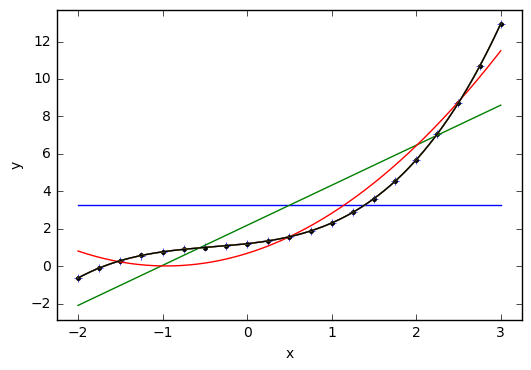

    0.100         0   -29.568
    0.100         1   -25.303
    0.100         2   -21.391
    0.100         3    -9.652
    0.100         4   -13.733
    0.100         5   -17.287
    0.100         6   -21.598


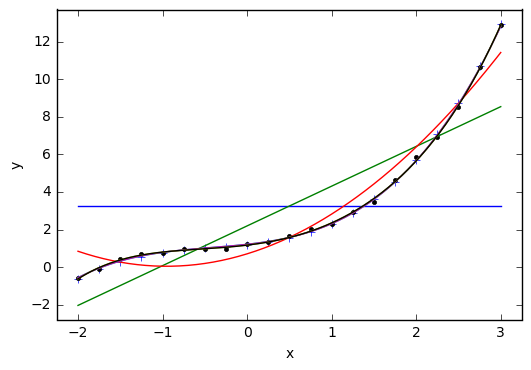

    1.000         0   -28.846
    1.000         1   -25.738
    1.000         2   -24.707
    1.000         3   -26.652
    1.000         4   -29.733
    1.000         5   -32.287
    1.000         6   -35.598


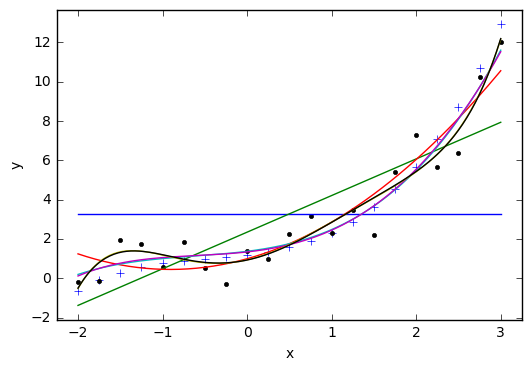

   10.000         0   -38.150
   10.000         1   -39.861
   10.000         2   -41.735
   10.000         3   -43.652
   10.000         4   -45.733
   10.000         5   -47.287
   10.000         6   -49.598


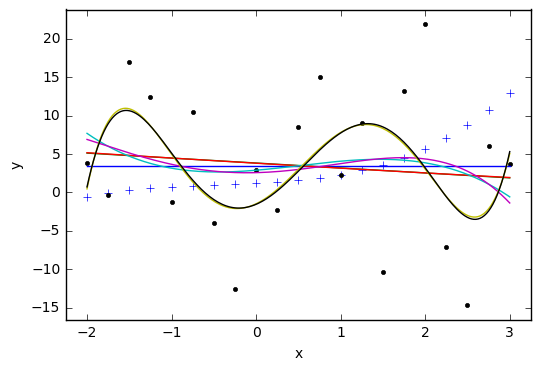

In [4]:
# plotFit( x, y, truth=ym, show=False )
yy = numpy.zeros( (4,7), dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
sig = 0.01
for k in range( 4 ):
    y = ym + sig * noise
    plotFit( x, y, truth=ym, show=False )
    for deg in range( 7 ) :
        poly = PolynomialModel( deg )
        np = poly.getNumberOfParameters()
        fitter = Fitter( x, poly )
        param = fitter.fit( y )
        plt.plot( xi, poly( xi ) )
        chisq = fitter.chisq
        stdev = fitter.stdevs
        logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
        print( fmt( sig ), fmt( deg ), fmt( logpr ) )
        yy[k,deg] = logpr
    sig *= 10
    plt.show()

Plot the evidences found: data with noise of 0.01 in green, noise of 0.1 in red, 1 in blue and 10 in magenta. 

Note that the model selection depends on the amount of noise present in the data.
    

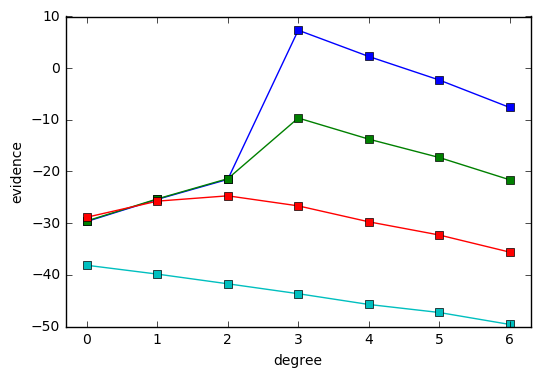

In [5]:
for k in range( 4 ) :
    plt.plot( yy[k,:], '-s' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.xlim( -0.3, 6.3 )
plt.show()